# Time Series Basics

In [98]:
import pandas as pd
import os
import datetime
import requests
import alpaca_trade_api as tradeapi
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
%matplotlib inline
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

In [99]:
# parse_dates formats pertinent columns into datetime
# index_col sets the Date column as the data frame index
NOC_df = pd.read_csv(Path('../Resources/NOC.csv'), parse_dates=True, index_col='Date')
BA_df = pd.read_csv(Path('../Resources/BA.csv'), parse_dates=True, index_col='Date')
XROLF_df = pd.read_csv(Path('../Resources/XROLF.csv'), parse_dates=True, index_col='Date')
PYPL_df = pd.read_csv(Path('../Resources/PYPL.csv'), parse_dates=True, index_col='Date')
JNJ_df = pd.read_csv(Path('../Resources/JNJ.csv'), parse_dates=True, index_col='Date')
PFE_df = pd.read_csv(Path('../Resources/PFE.csv'), parse_dates=True, index_col='Date')
TSLA_df = pd.read_csv(Path('../Resources/TSLA.csv'), parse_dates=True, index_col='Date')
AAPL_df = pd.read_csv(Path('../Resources/AAPL.csv'), parse_dates=True, index_col='Date')
BTC_df = pd.read_csv(Path('../Resources/BTC.csv'), parse_dates=True, index_col='Date')

In [100]:
# Drop unnecessary columns
NOC_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
BA_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
XROLF_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
PYPL_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
JNJ_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
PFE_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
TSLA_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
AAPL_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
BTC_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

In [101]:
# Rename Column
NOC_df.columns = ["Northrop Grumman"]
BA_df.columns = ["Boeing"]
XROLF_df.columns = ["Xero Limited"]
PYPL_df.columns = ["Paypal Holdings Inc"]
JNJ_df.columns = ["Johnson & Johnson"]
PFE_df.columns = ["Pfizer Inc"]
TSLA_df.columns = ["Tesla Inc"]
AAPL_df.columns = ["Apple Inc"]
BTC_df.columns = ["BitCoin"]

In [102]:
# Calculate Daily Returns for BTC to match the price level compared to other stock prices
NOC_df = NOC_df.pct_change()
BA_df = BA_df.pct_change()
XROLF_df = XROLF_df.pct_change()
PYPL_df = PYPL_df.pct_change()
JNJ_df = JNJ_df.pct_change()
PFE_df = PFE_df.pct_change()
TSLA_df = TSLA_df.pct_change()
AAPL_df = AAPL_df.pct_change()
BTC_df = BTC_df.pct_change()

## Combining Daily Returns

In [103]:
# Concatenate all DataFrames into a single DataFrame
Combined_PCT_Returns = pd.concat([ NOC_df, BA_df, XROLF_df, PYPL_df, JNJ_df, PFE_df, TSLA_df, AAPL_df, BTC_df ], axis="columns", join="inner")
Combined_PCT_Returns.sort_index(inplace=True)
Combined_PCT_Returns.head()

Northrop Grumman    Boeing  Xero Limited  Paypal Holdings Inc  \
Date                                                                        
2016-01-06               NaN       NaN           NaN                  NaN   
2016-01-07         -0.012390 -0.041922      0.000000            -0.025015   
2016-01-08         -0.010845 -0.022705      0.000000            -0.013281   
2016-01-11          0.010964  0.001692     -0.126984             0.010707   
2016-01-12          0.004306  0.013133      0.000000             0.001211   

            Johnson & Johnson  Pfizer Inc  Tesla Inc  Apple Inc   BitCoin  
Date                                                                       
2016-01-06                NaN         NaN        NaN        NaN       NaN  
2016-01-07          -0.011655   -0.006644  -0.015477  -0.042205  0.067450  
2016-01-08          -0.010683   -0.012739  -0.021563   0.005288 -0.010519  
2016-01-11          -0.006011    0.002258  -0.014929   0.016192  0.000975  
2016-01-12           0.006867   -0.002253   0.010200   0.014513 -0.028406

## Daily Returns

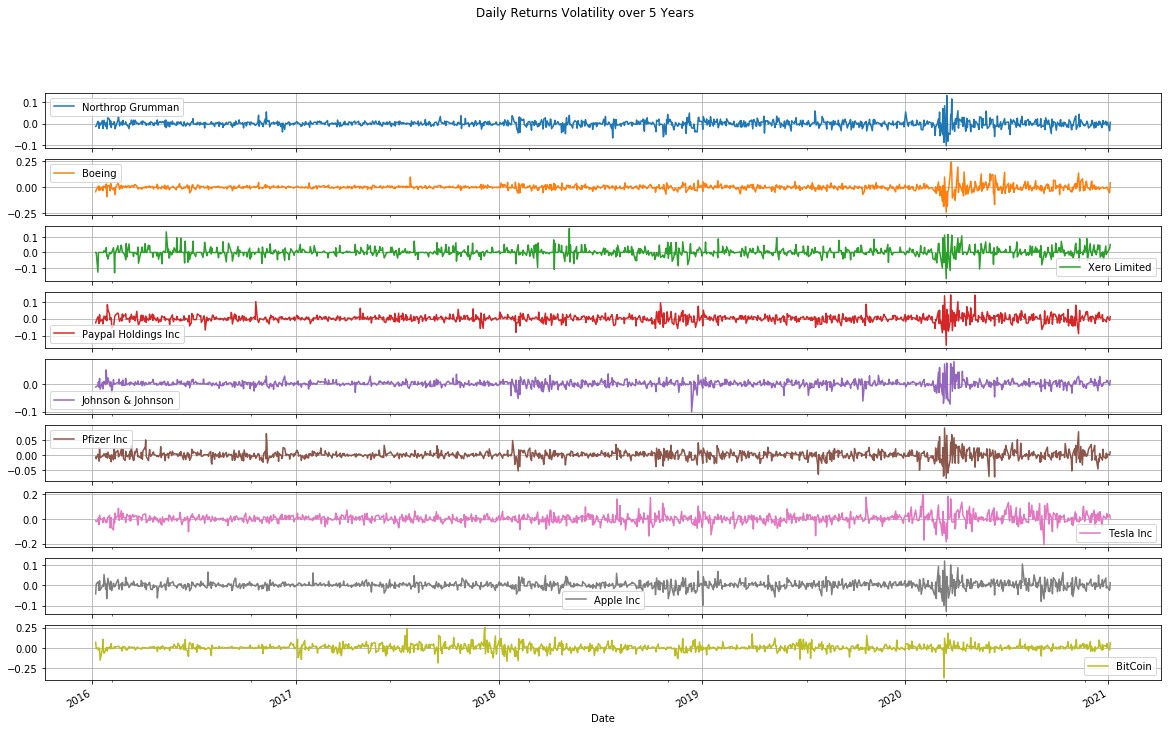

In [104]:
# Plot the closing prices using a line plot
Combined_PCT_Returns.plot(
    figsize=(20,12), 
    title="Daily Returns Volatility over 5 Years",
    #subplots=True,
    grid=True);

### Cumulative Returns

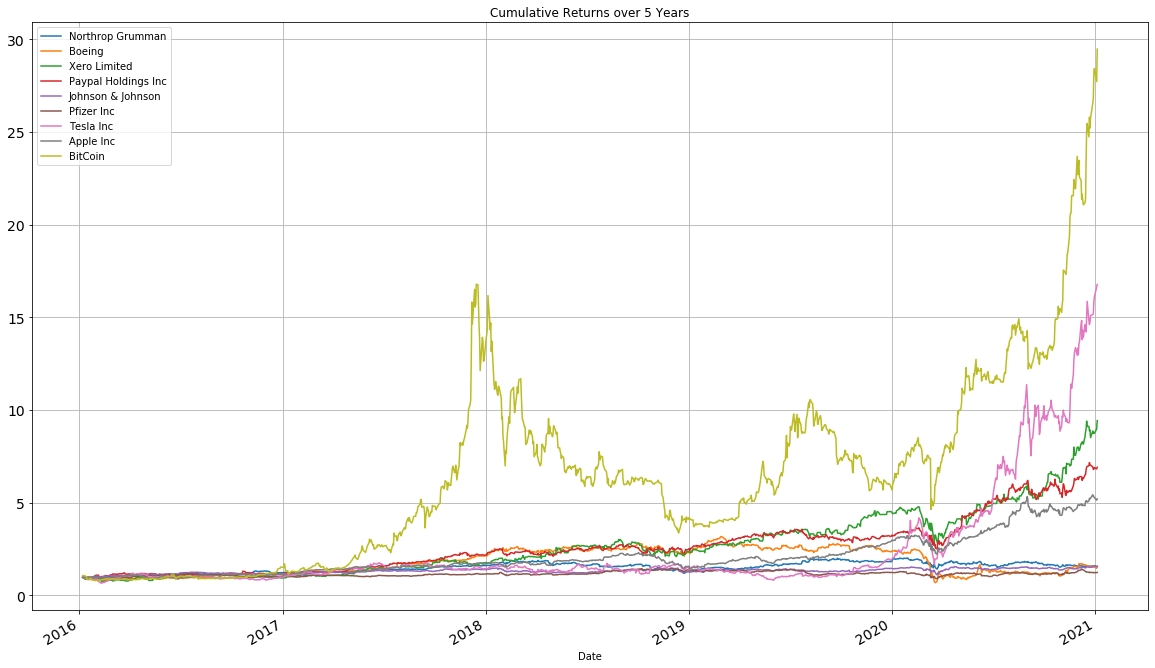

In [105]:
# Plot cumulative returns
Cumulative_Returns = (1 + Combined_PCT_Returns).cumprod()
Cumulative_Returns.plot(
    kind='line', 
    figsize=(20,12),
    title="Cumulative Returns over 5 Years",
    fontsize=14,
    #subplots=True,
    grid=True);

## Risk

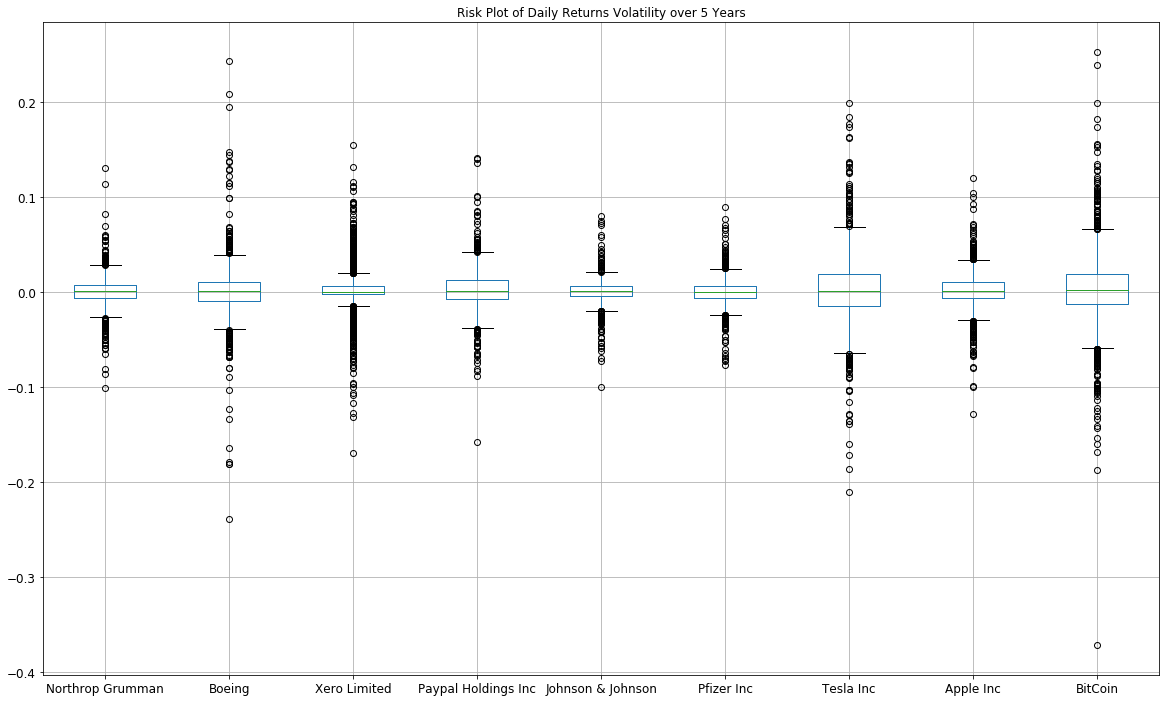

In [106]:
# Box plot to visually show risk
Combined_PCT_Returns.plot(
    kind = "box", 
    figsize=(20,12),
    title="Risk Plot of Daily Returns Volatility over 5 Years",
    fontsize=12,
    #subplots=True,
    grid=True);

## Standard Deviation

In [107]:
# Daily Standard Deviations for each portfolio. 
Combined_PCT_Returns_STD = pd.DataFrame(Combined_PCT_Returns.std())
Combined_PCT_Returns_STD.columns = ["Daily Standard Deviation"]
Combined_PCT_Returns_STD

Daily Standard Deviation
Northrop Grumman                     0.016032
Boeing                               0.028773
Xero Limited                         0.026828
Paypal Holdings Inc                  0.021500
Johnson & Johnson                    0.012545
Pfizer Inc                           0.014173
Tesla Inc                            0.036407
Apple Inc                            0.019018
BitCoin                              0.041977

In [108]:
# Determine which portfolios are riskier than the Apple
print("The Below Portfolios are Riskier than Apple Inc")
Riskier_BTC = Combined_PCT_Returns_STD.loc[Combined_PCT_Returns_STD["Daily Standard Deviation"] > Combined_PCT_Returns_STD.loc["Apple Inc", "Daily Standard Deviation"]]
Riskier_BTC

The Below Portfolios are Riskier than Apple Inc


Daily Standard Deviation
Boeing                               0.028773
Xero Limited                         0.026828
Paypal Holdings Inc                  0.021500
Tesla Inc                            0.036407
BitCoin                              0.041977

## Exponentially Weighted Moving Average

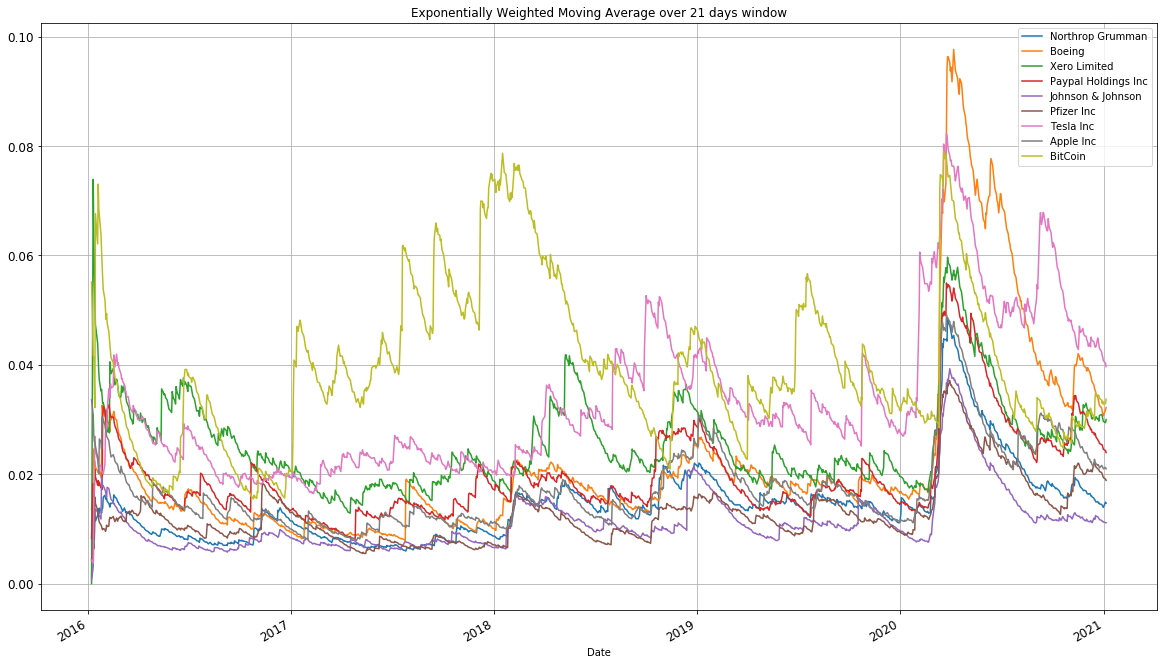

In [112]:
# Calculate a rolling window using the exponentially weighted moving average. 
Combined_PCT_Returns.ewm(halflife = 21).std().plot(
    kind='line', 
    figsize=(20,12),
    title="Exponentially Weighted Moving Average over 21 days window",
    fontsize=12,
    #subplots=True,
    grid=True);

## Analysis

Our analysis includes the following:
The annualized standard deviation (252 trading days) for all portfolios:
            Northrop Grumman    Boeing  Xero Limited  Paypal Holdings Inc  \
Date                                                                        
2020-12-29          0.025192  0.055189      0.035081             0.033023   
2020-12-30          0.025178  0.055189      0.035081             0.033023   
2020-12-31          0.025089  0.055174      0.035066             0.033002   
2021-01-04          0.024932  0.055274      0.035078             0.032984   
2021-01-05          0.024936  0.055344      0.035201             0.032984   

            Johnson & Johnson  Pfizer Inc  Tesla Inc  Apple Inc   BitCoin  
Date                                                                       
2020-12-29           0.019156    0.022672   0.056327   0.029436  0.041449  
2020-12-30           0.019170    0.022675   0.056366   0.029443  0.041534  
2020-12-31           0.019177    0.022675   0.

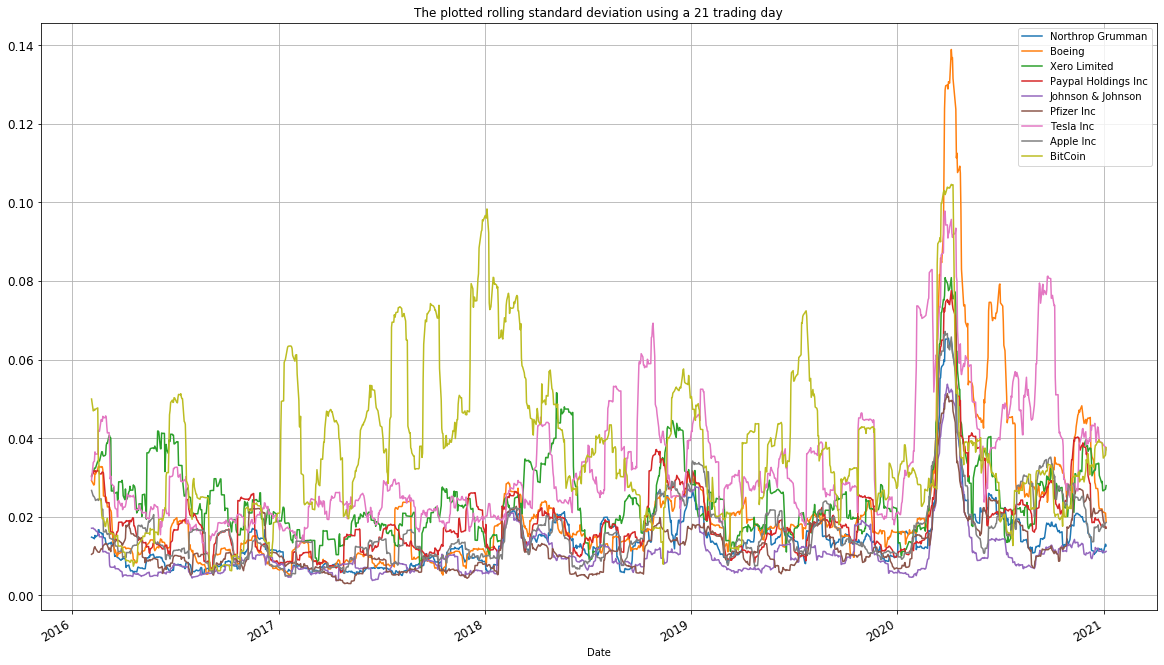

In [190]:
print("Our analysis includes the following:")
print("==========================================================================")
# The annualized standard deviation (252 trading days) for all portfolios:
print("The annualized standard deviation (252 trading days) for all portfolios:")
Annualized = Combined_PCT_Returns.rolling(window=252).std()
Annualized.dropna(inplace=True)
print(Annualized.tail())

# The plotted rolling standard deviation using a 21 trading day window for all portfolios:
print()
print("The plotted rolling standard deviation using a 21 trading day window for all portfolios:")
Combined_PCT_Returns.rolling(window=21).std().plot(
    kind='line',
    figsize=(20, 12),
    title="The plotted rolling standard deviation using a 21 trading day",
    fontsize=12,
    #subplots=True,
    grid=True);

The calculated annualized Sharpe Ratios and the accompanying bar plot visualization:

Northrop Grumman       0.475622
Boeing                 0.413672
Xero Limited           1.269221
Paypal Holdings Inc    1.305457
Johnson & Johnson      0.558330
Pfizer Inc             0.304024
Tesla Inc              1.266697
Apple Inc              1.246204
BitCoin                1.355787
dtype: float64

Bar Plot for Sharp Ratio


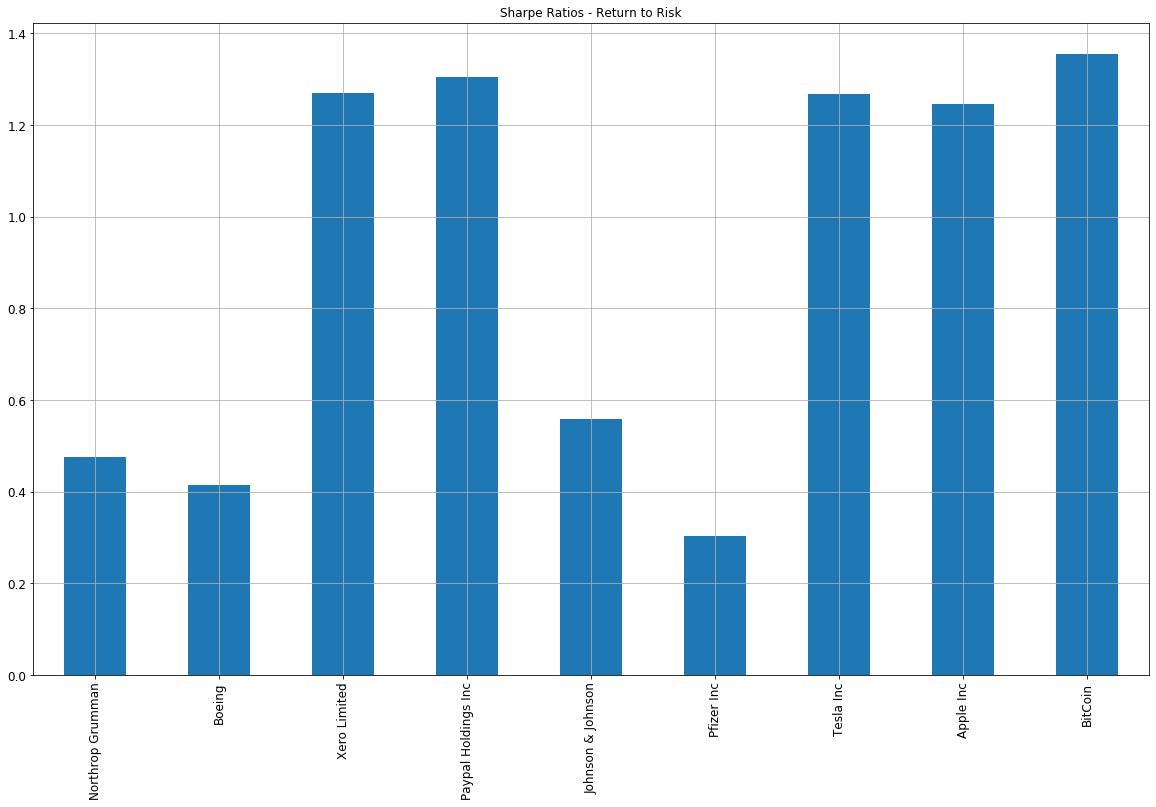

In [191]:
# The calculated annualized Sharpe Ratios and the accompanying bar plot visualization:
print("The calculated annualized Sharpe Ratios and the accompanying bar plot visualization:")
print("====================================================================================")
print()
# Calculate annualized Sharpe Ratios
Anunualized_Sharpe_Ratios = (Combined_PCT_Returns.mean() * 252) / (Combined_PCT_Returns.std() * np.sqrt(252))
print(Anunualized_Sharpe_Ratios)
print()
print("Bar Plot for Sharp Ratio")
# Visualize the sharpe ratios as a bar plot
Anunualized_Sharpe_Ratios.plot(
    kind='bar', 
    title="Sharpe Ratios - Return to Risk",
    figsize=(20,12),
    fontsize=12,
    #subplots=True,
    grid=True);

A correlation between portfolios


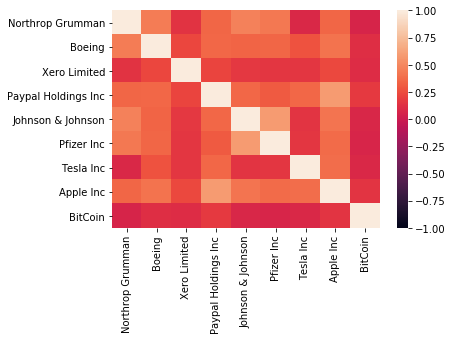

In [195]:
# Construct a correlation table
print("A correlation between portfolios")
print("================================================================")
Correlation = Combined_PCT_Returns.corr()
Correlation
sns.heatmap(Correlation, vmin=-1, vmax=1);

How does your portfolio fair?
Based on the below example, information, and  plots I can say that my portfolio's returns is the highest.
For example: A $10,000 investement will be $13,575 on 04/23/2019 on My Custom Portfolio (Highest of them)
My custom portfolio have the second best Sharpe Ratio after Algo 1 which makes it to be attractive also.

            Northrop Grumman       Boeing  Xero Limited  Paypal Holdings Inc  \
Date                                                                           
2020-12-29       1580.248797  1557.660426   8747.619127          6798.999382   
2020-12-30       1588.754047  1560.685694   8747.619127          6813.125221   
2020-12-31       1599.831991  1541.885723   8747.619127          6892.289494   
2021-01-04       1547.540339  1460.203112   8978.571190          6825.191230   
2021-01-05       1557.148078  1524.382352   9431.745714          6913.184344   

            Johnson & Johnson   Pfizer Inc     Tesla Inc    Apple Inc  \
Date              

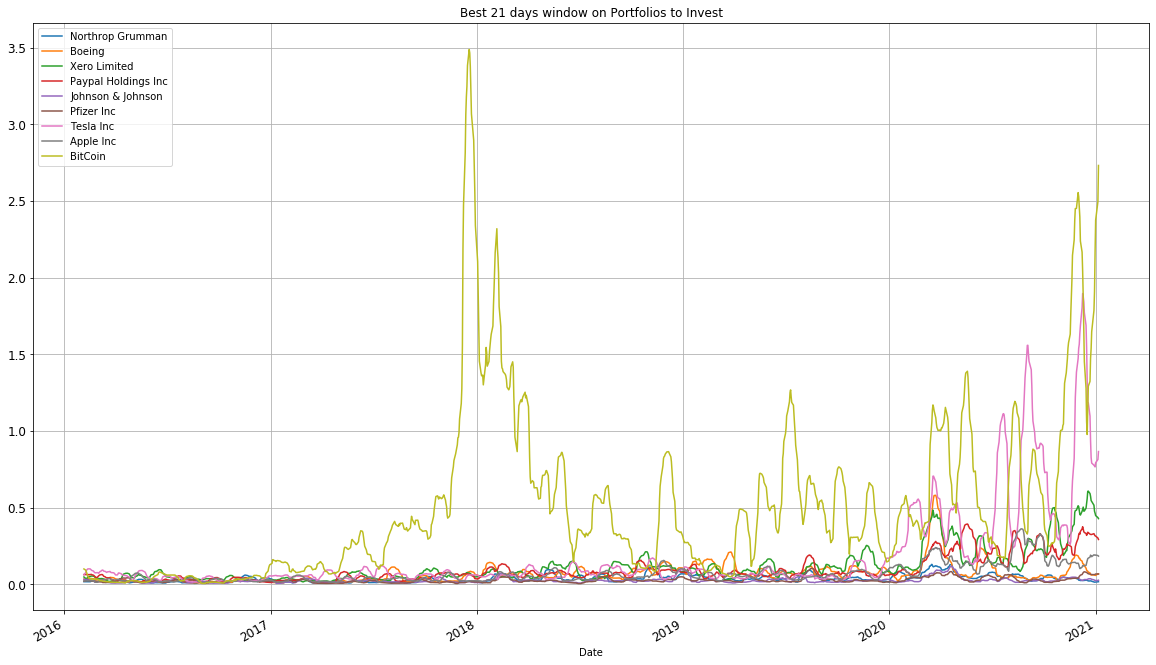

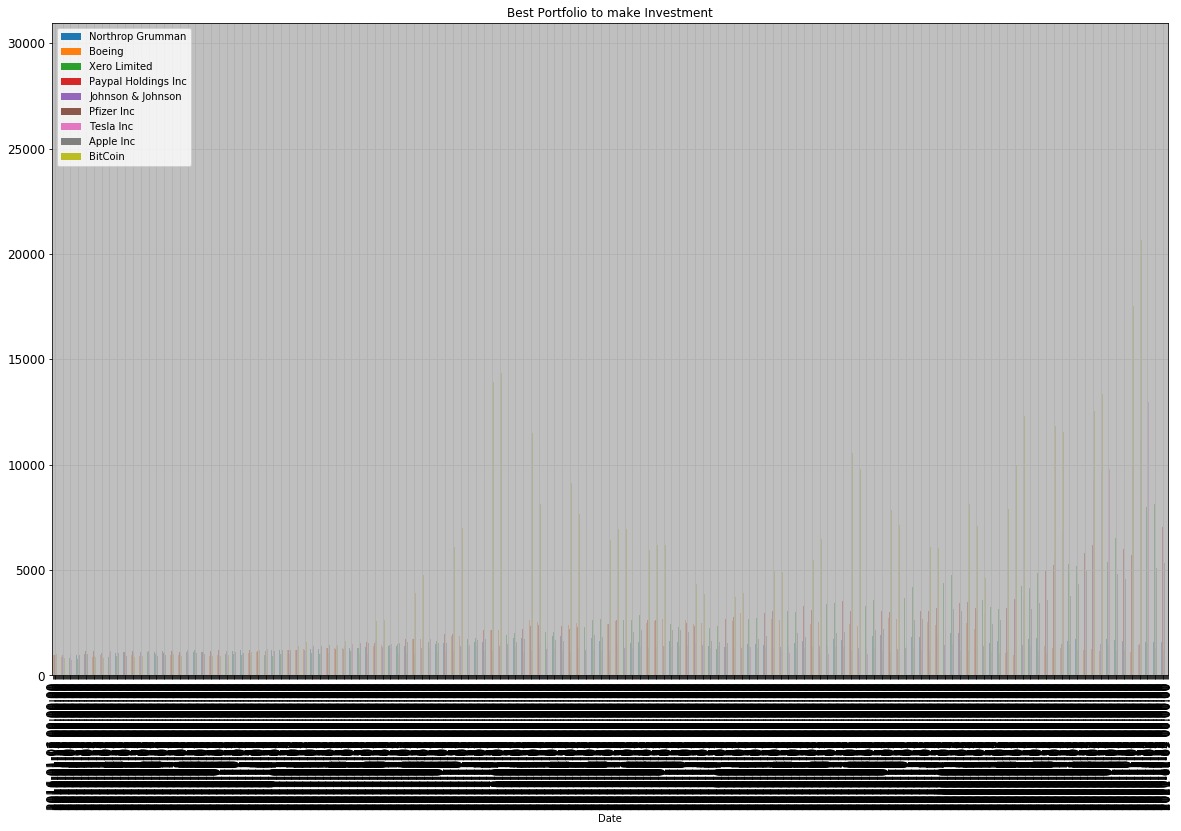

In [201]:
# Using your custom portfolio and one other of your choosing:
# The plotted beta. . How does your portfolio fair?")
print("How does your portfolio fair?")
print("=============================")
print("Based on the below example, information, and  plots We'd say that BTC, Tesla, and Apple were the best stocks/coins to Invest")
print("For example: A $10,000 investement in BitCoin would be $294,226 today. (Highest of them)")
print("For example: A $10,000 investement in Tesla would be $167,800 today. (Second Highest of them)")
print("For example: A $10,000 investement in Tesla would be $167,800 today. (Second Highest of them)")
print()
Best_Portfolio = (1+ Combined_PCT_Returns).cumprod()
Best_Portfolio.rolling(window=21).std().plot(
    kind='line', 
    figsize=(20, 12),
    title="Best 21 days window on Portfolios to Invest",
    fontsize=12,
    #subplots=True,
    grid=True);

Initial_Investment = 10000
Cumulative_Profit = Initial_Investment * Best_Portfolio
print(Cumulative_Profit.tail())
Cumulative_Profit.plot(
    kind='line',
    figsize=(20, 12),
    title="Best Portfolio to make Investment",
    fontsize=12,
    #subplots=True,
    grid=True);

In [115]:
# Plot the weekly average closing prices as a line chart
weekly.plot(figsize=(20,15));

NameError: name 'weekly' is not defined

# Optional Challenge

In [116]:
# Select the rows that only contain `Close` in the column header
df.loc[:, df.columns.str.contains('Close')].head()

NameError: name 'df' is not defined

In [117]:
# parse_dates formats pertinent columns into datetime
# index_col sets the Date column as the data frame index
df_1 = pd.read_csv(Path('../Resources/BTC.csv'), parse_dates=True, index_col='Date')
df_1.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-06  431.855988  431.855988  426.341003  429.105011  429.105011   
2016-01-07  430.010986  458.765991  429.076996  458.048004  458.048004   
2016-01-08  457.537994  462.933990  447.937988  453.230011  453.230011   
2016-01-09  453.382996  454.640015  446.889008  447.610992  447.610992   
2016-01-10  448.238007  448.308990  440.351013  447.990997  447.990997   

                Volume  
Date                    
2016-01-06  34042500.0  
2016-01-07  87562200.0  
2016-01-08  56993000.0  
2016-01-09  32278000.0  
2016-01-10  35995900.0

In [118]:
# Use the `hpfilter` function to decompose the GDP column into the trend and noise components.
import statsmodels.api as sm

gdp_noise, gdp_trend = sm.tsa.filters.hpfilter(df_1["Close"])

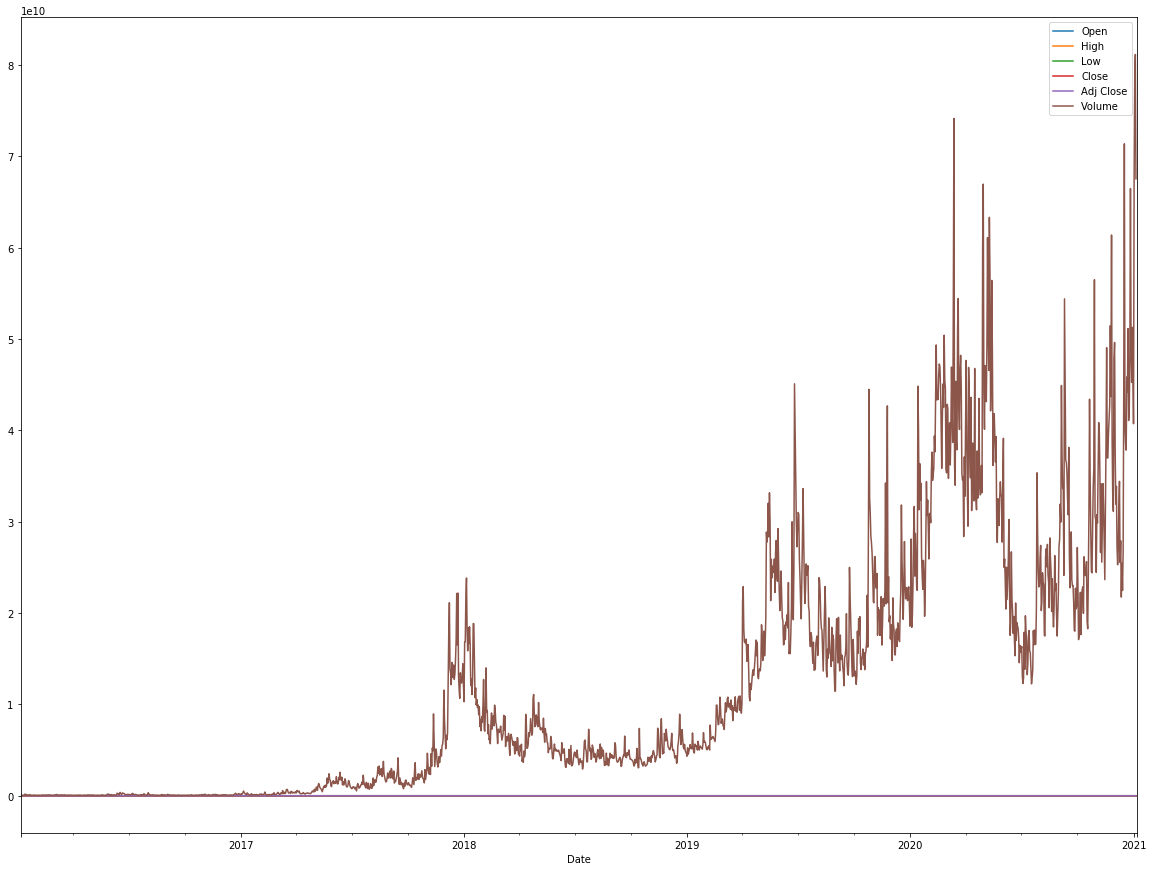

In [119]:
df_1.plot(figsize=(20,15))

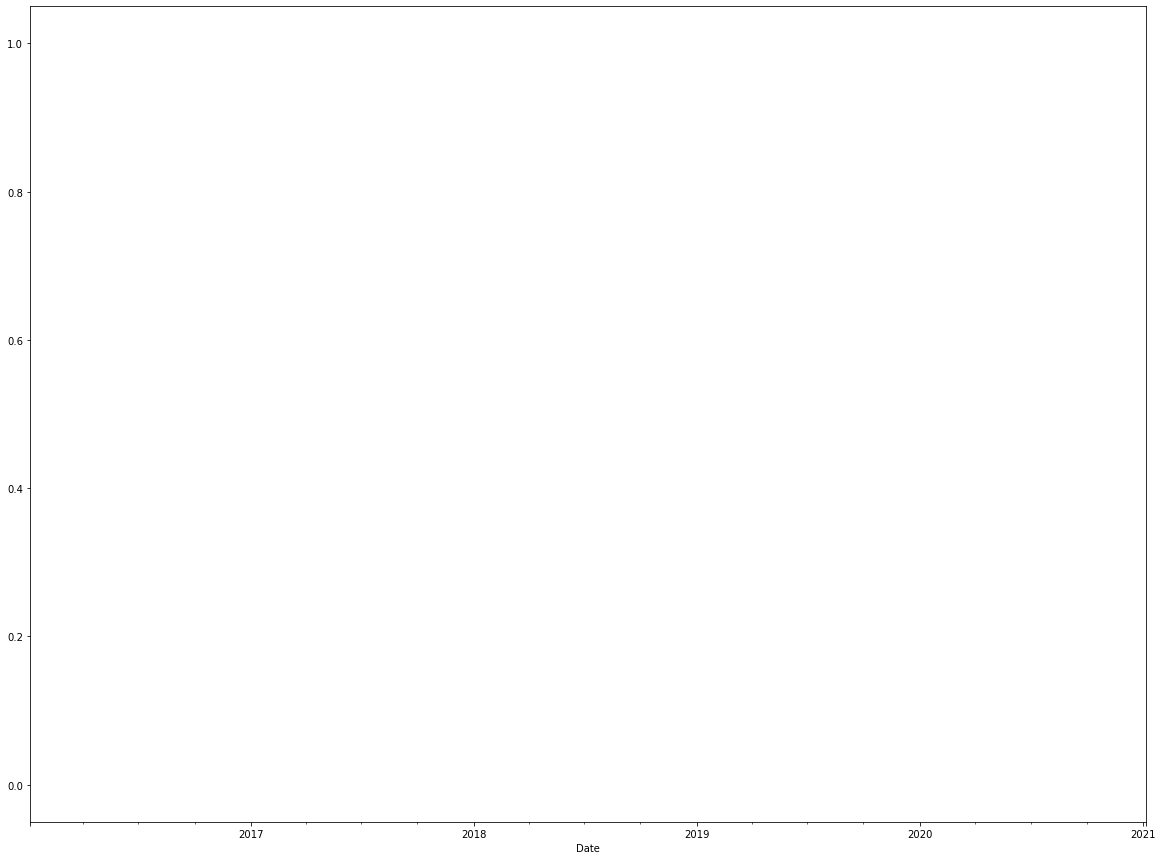

In [120]:
gdp_trend.plot(figsize=(20,15))

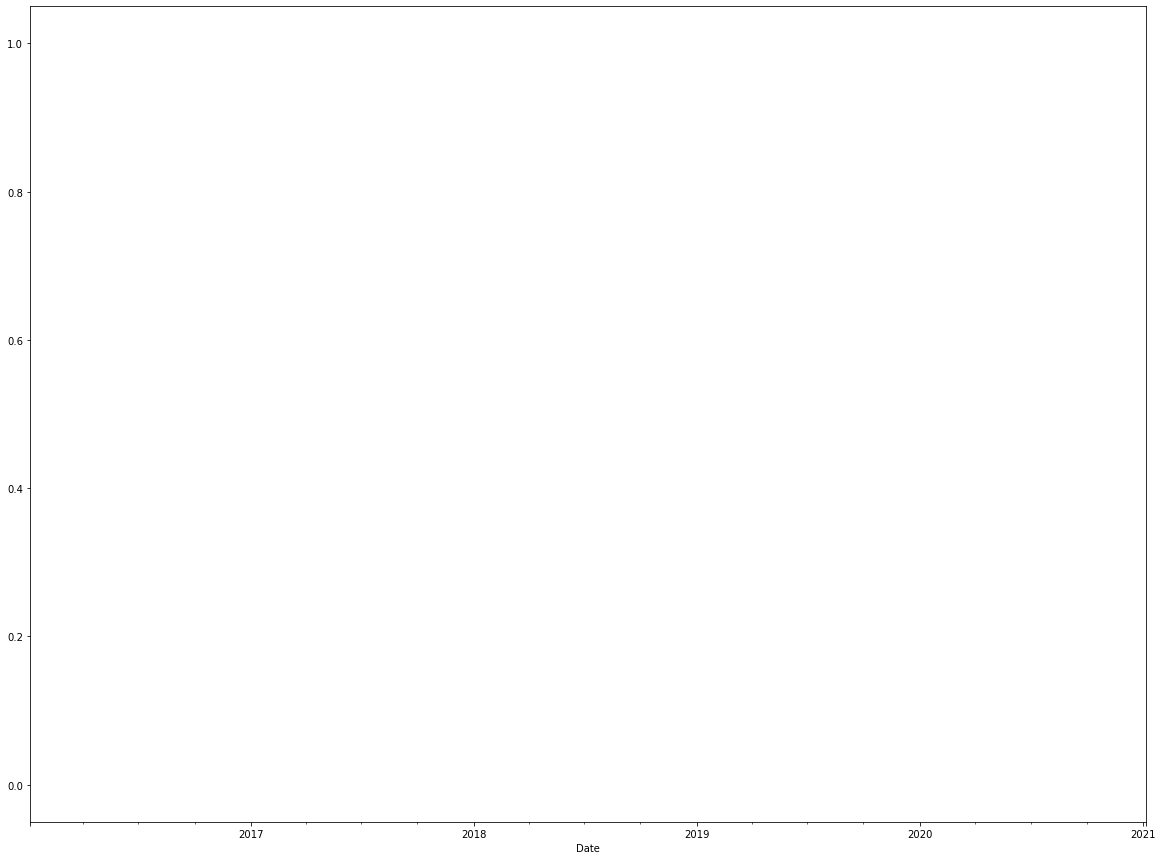

In [121]:
gdp_noise.plot(figsize=(20,15))

In [122]:
df_1.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-06  431.855988  431.855988  426.341003  429.105011  429.105011   
2016-01-07  430.010986  458.765991  429.076996  458.048004  458.048004   
2016-01-08  457.537994  462.933990  447.937988  453.230011  453.230011   
2016-01-09  453.382996  454.640015  446.889008  447.610992  447.610992   
2016-01-10  448.238007  448.308990  440.351013  447.990997  447.990997   

                Volume  
Date                    
2016-01-06  34042500.0  
2016-01-07  87562200.0  
2016-01-08  56993000.0  
2016-01-09  32278000.0  
2016-01-10  35995900.0

In [123]:
df_1.Close.autocorr(1)

0.9974704681087012

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

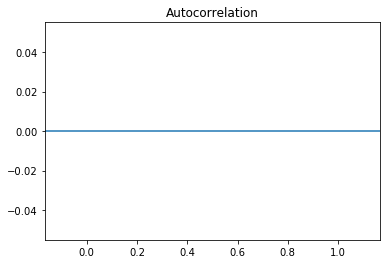

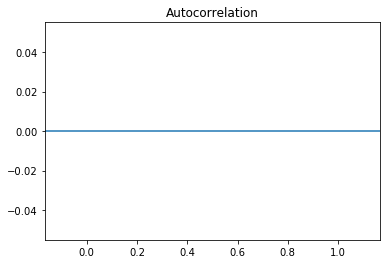

In [125]:
# Plot the ACF of the `bid_ask_spread` data with a lag of 30
plot_acf(df_1['Close'], lags=30, zero=False)

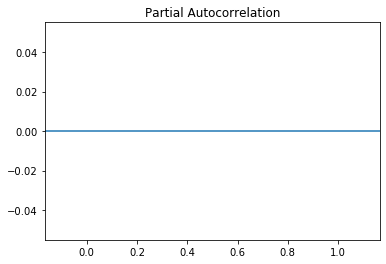

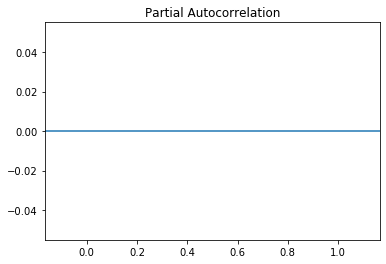

In [126]:
plot_pacf(df_1['Close'], lags=30, zero=False)

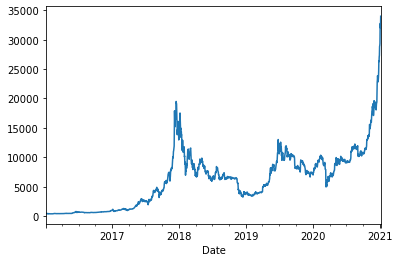

In [127]:
df_1.Close.plot()

In [128]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df_1.Close)

(nan,
 nan,
 0,
 1827,
 {'1%': -3.433934297502219,
  '5%': -2.8631232673540117,
  '10%': -2.5676128776645637},
 nan)

In [129]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df_1['Returns'] = df_1.Close.pct_change()

In [130]:
# Drop the NaNs created by the pct_change function
df_1 = df_1.dropna()

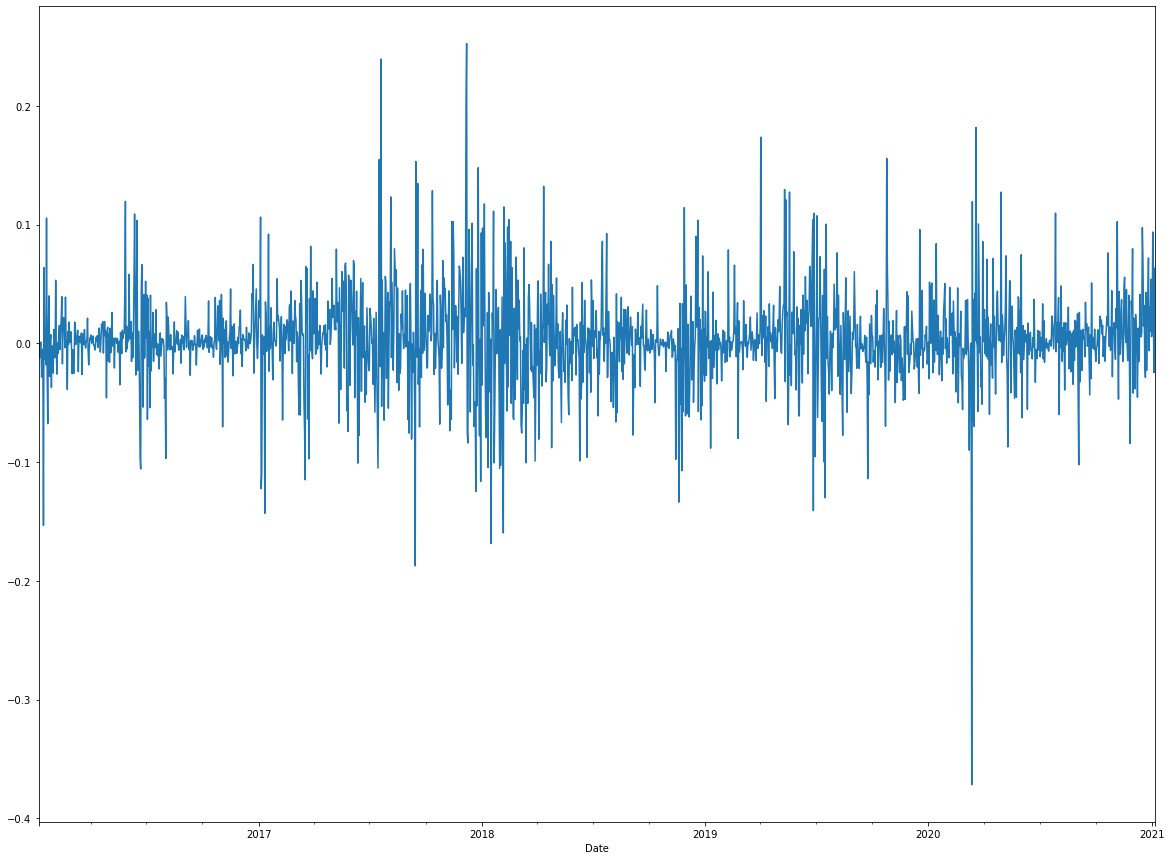

In [131]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df_1.Returns.plot(figsize=(20,15))

In [132]:
# Subtract the upward trend for the closing prices using the `diff()` function
df_1['Diff'] = df_1.Close.diff()

In [133]:
# Drop the NaNs created from the diff function
df_1 = df_1.dropna()

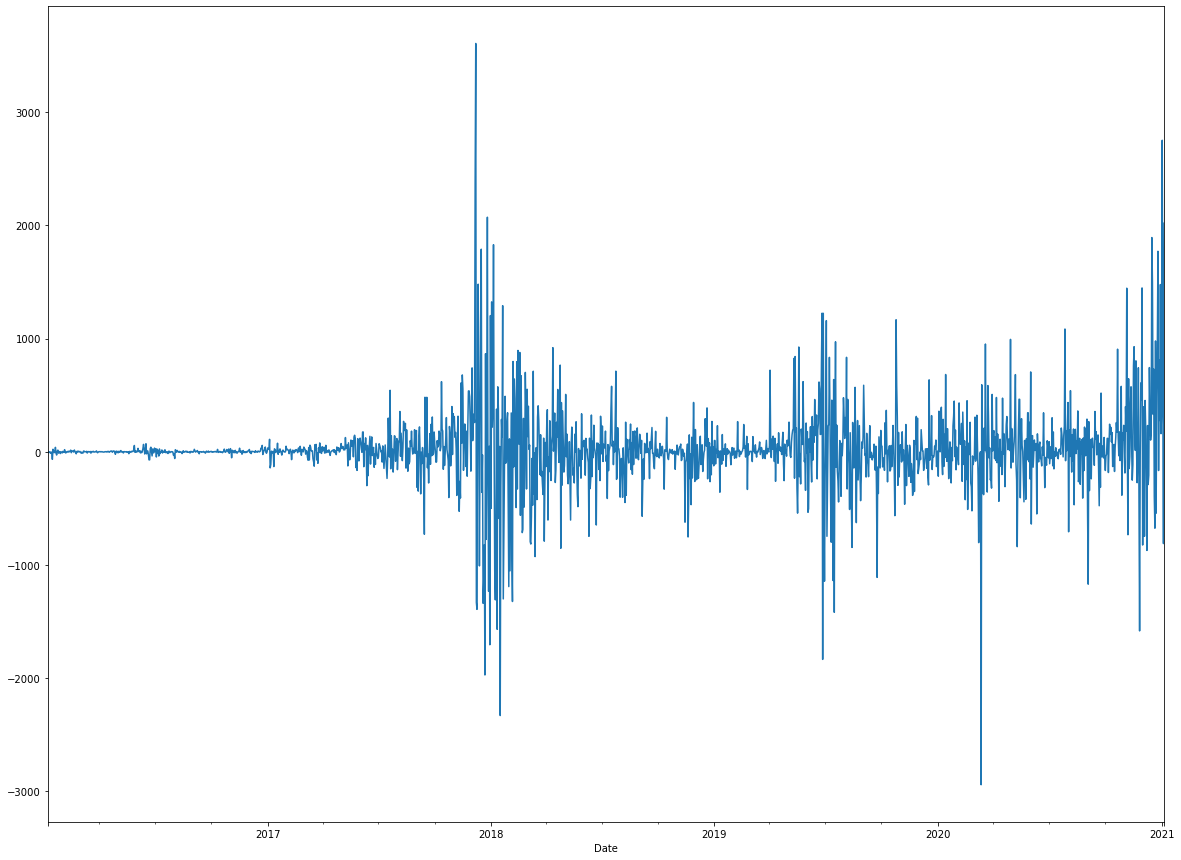

In [134]:
# Plot the 
df_1.Diff.plot(figsize=(20,15))

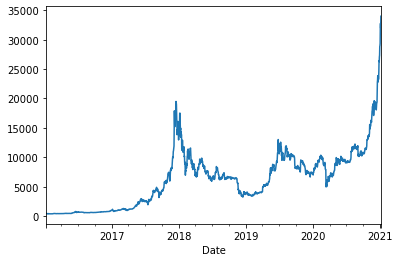

In [135]:
# The series is non-stationary (Trends upwards)
df_1.Close.plot()

In [136]:
# Select only the returns
returns = df_1.loc[:, 'Returns']

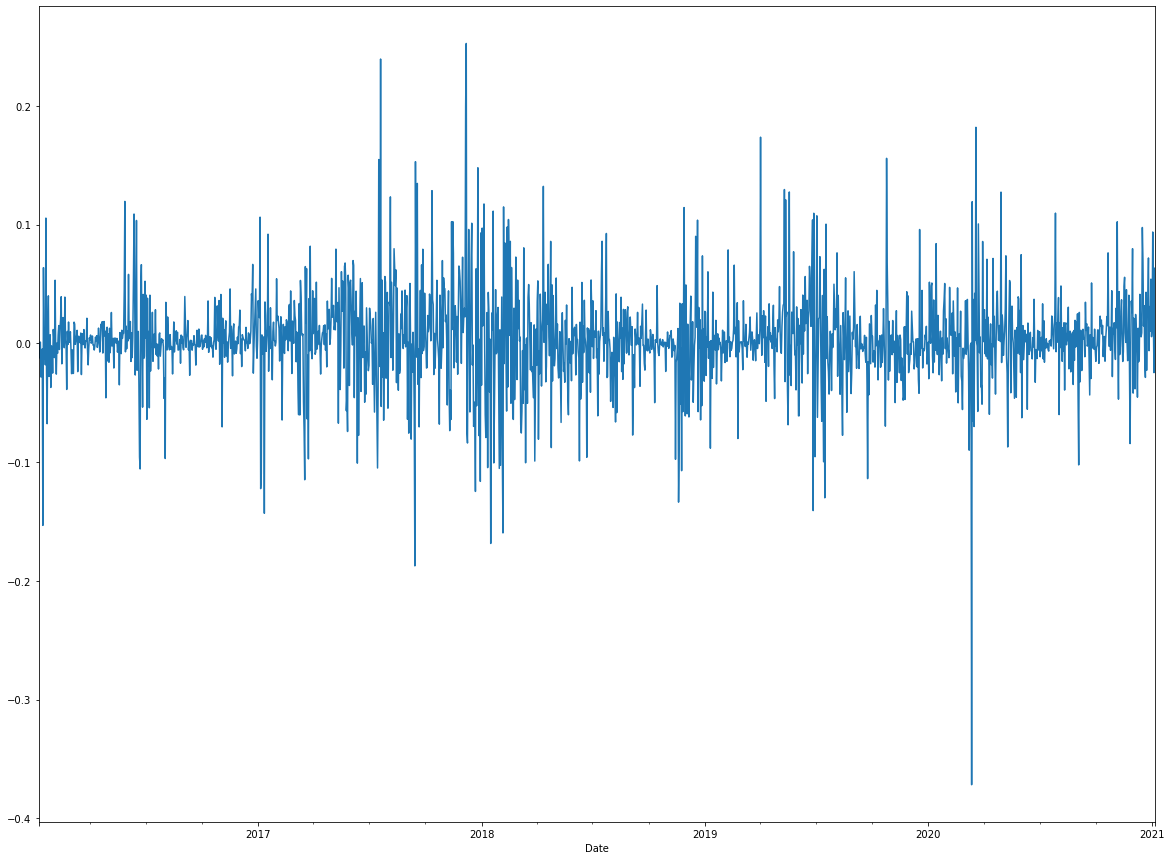

In [137]:
# Stationarity now seen
returns.plot(figsize=(20,15))

In [138]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [139]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns.values, order=(2,2))

In [140]:
# Fit the model to the data
results = model.fit()

In [141]:
df_1['Returns'].tail(20)

Date
2020-12-17    0.070132
2020-12-18    0.014593
2020-12-19    0.031631
2020-12-20   -0.016445
2020-12-21   -0.028718
2020-12-22    0.042974
2020-12-23   -0.022776
2020-12-24    0.021281
2020-12-25    0.039132
2020-12-26    0.071853
2020-12-27   -0.006231
2020-12-28    0.030927
2020-12-29    0.010250
2020-12-30    0.054034
2020-12-31    0.005574
2021-01-01    0.012842
2021-01-02    0.093726
2021-01-03    0.020380
2021-01-04   -0.024712
2021-01-05    0.063197
Name: Returns, dtype: float64

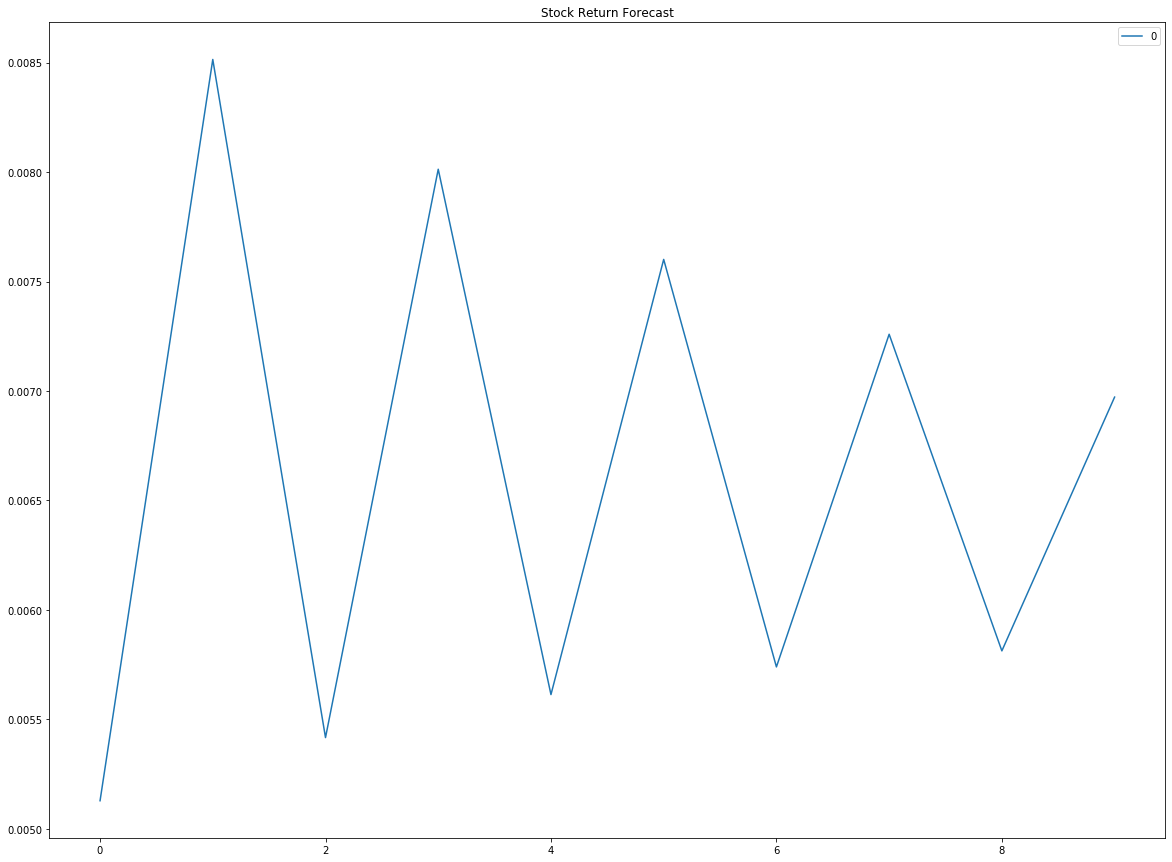

In [142]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Stock Return Forecast", figsize=(20,15))

In [143]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:                     ARMA(2, 2)   Log Likelihood                3323.890
Method:                       css-mle   S.D. of innovations              0.039
Date:                Wed, 06 Jan 2021   AIC                          -6635.779
Time:                        20:41:22   BIC                          -6602.723
Sample:                             0   HQIC                         -6623.586
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.001      2.451      0.014       0.001       0.006
ar.L1.y        0.1043      0.098      1.059      0.289      -0.089       0.297
ar.L2.y        0.8621      0.098      8.832      0.000       0.671       1.053
ma.L1.y       -0.1168      0.106     -1.103      0.270      -0.324       0.091
ma.L2.y       -0.8350      0.105     -7.970      0.000      -1.040      -0.630
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0182           +0.0000j            1.0182            0.0000
AR.2           -1.1392           +0.0000j            1.1392            0.5000
MA.1            1.0267           +0.0000j            1.0267            0.0000
MA.2           -1.1665           +0.0000j            1.1665            0.5000
-----------------------------------------------------------------------------
"""

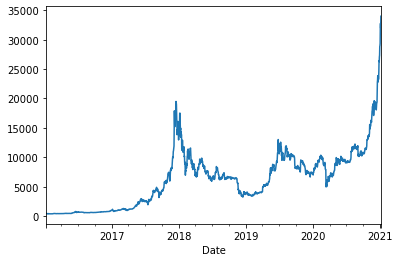

In [144]:
df_1.Close.plot()

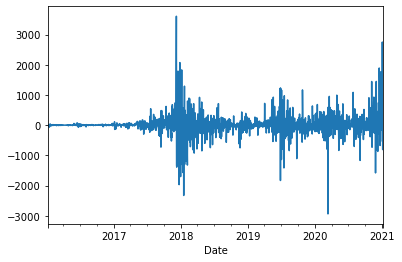

In [145]:
# Differencing the Settle price stationarizes the time series
df_1.Close.diff().plot()

In [146]:
from statsmodels.tsa.arima_model import ARIMA

In [147]:
# Create an ARIMA model
model = ARIMA(df_1.Close.values, order=(1, 1, 1))

In [148]:
# Fit the model to the data
results = model.fit()

In [149]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1824
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13265.511
Method:                       css-mle   S.D. of innovations            348.537
Date:                Wed, 06 Jan 2021   AIC                          26539.021
Time:                        20:41:32   BIC                          26561.056
Sample:                             1   HQIC                         26547.150
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5509     25.415      1.123      0.261     -21.263      78.364
ar.L1.D.y      0.9863      0.016     63.553      0.000       0.956       1.017
ma.L1.D.y     -0.9608      0.022    -44.156      0.000      -1.003      -0.918
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0139           +0.0000j            1.0139            0.0000
MA.1            1.0408           +0.0000j            1.0408            0.0000
-----------------------------------------------------------------------------
"""

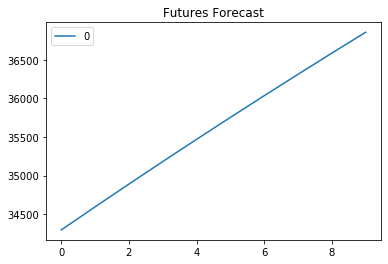

In [150]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [151]:
# ARIMA Model using a Lag of 2

In [152]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df_1.Close.values, order=(2, 1, 1))
results2 = model2.fit()

In [153]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1824
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -13265.507
Method:                       css-mle   S.D. of innovations            348.536
Date:                Wed, 06 Jan 2021   AIC                          26541.013
Time:                        20:41:36   BIC                          26568.557
Sample:                             1   HQIC                         26551.174
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.7210     25.733      1.116      0.264     -21.714      79.156
ar.L1.D.y      0.9889      0.032     30.473      0.000       0.925       1.053
ar.L2.D.y     -0.0022      0.025     -0.089      0.929      -0.051       0.047
ma.L1.D.y     -0.9615      0.022    -42.836      0.000      -1.005      -0.917
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0135           +0.0000j            1.0135            0.0000
AR.2          440.3872           +0.0000j          440.3872            0.0000
MA.1            1.0401           +0.0000j            1.0401            0.0000
-----------------------------------------------------------------------------
"""

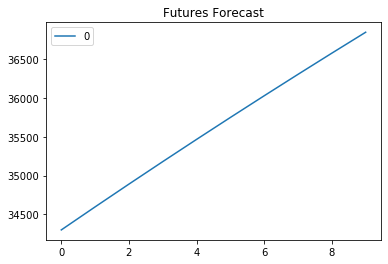

In [154]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [155]:
from arch import arch_model

In [156]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(returns * 100, mean="Zero", vol="GARCH", p=1, q=1)

In [157]:
# Fit the GARCH Model
res = model.fit(disp="off")

In [158]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -4898.12
Distribution:                  Normal   AIC:                           9802.24
Method:            Maximum Likelihood   BIC:                           9818.77
                                        No. Observations:                 1825
Date:                Wed, Jan 06 2021   Df Residuals:                     1822
Time:                        20:41:38   Df Model:                            3
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7030      0.303      2.321  2.028e-02   [  0.109,  1.297]
alpha[1]       0.1546  4.852e-02      3.186  1.443e-03 [5.948e-02,  0.250]
beta[1]        0.8175  3.849e-02     21.237 4.331e-100   [  0.742,  0.893]
==========================================================================

Covariance estimator: robust
"""

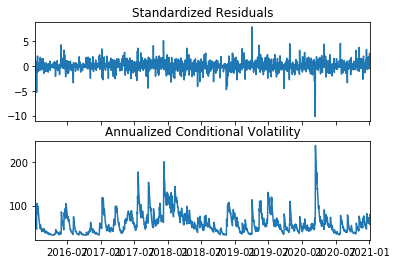

In [159]:
# Plot the model estimate of annualized volatility
fig = res.plot(annualize='D')

In [160]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 3
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start='2020-12-30', horizon=forecast_horizon)
forecasts

In [161]:
# Annualize the forecast
import numpy as np

intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

h.1        h.2        h.3
Date                                       
2020-12-30  65.516707  65.951788  66.371975
2020-12-31  60.812721  61.416560  61.997888
2021-01-01  57.136186  57.883242  58.600292
2021-01-02  79.170120  79.182693  79.194913
2021-01-03  73.910509  74.076013  74.236537
2021-01-04  69.861864  70.152975  70.434796
2021-01-05  75.649029  75.762797  75.873222

In [162]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date  2020-12-30  2020-12-31  2021-01-01  2021-01-02  2021-01-03  2021-01-04  \
h.1    65.516707   60.812721   57.136186   79.170120   73.910509   69.861864   
h.2    65.951788   61.416560   57.883242   79.182693   74.076013   70.152975   
h.3    66.371975   61.997888   58.600292   79.194913   74.236537   70.434796   

Date  2021-01-05  
h.1    75.649029  
h.2    75.762797  
h.3    75.873222

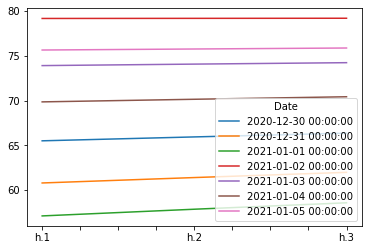

In [163]:
final.plot()

In [164]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [165]:
df_shorttimeframe = df_1["2020-12-01":]
df_shorttimeframe.Close.head()

Date
2020-12-01    18802.998047
2020-12-02    19201.091797
2020-12-03    19445.398438
2020-12-04    18699.765625
2020-12-05    19154.230469
Name: Close, dtype: float64

In [166]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = df_shorttimeframe.reset_index().Date.apply(lambda t: t.timestamp()).values.reshape(-1, 1)
X[:5]

array([[1.6067808e+09],
       [1.6068672e+09],
       [1.6069536e+09],
       [1.6070400e+09],
       [1.6071264e+09]])

In [167]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(36, 1)

In [168]:
y = df_shorttimeframe.Close

In [169]:
# Create a model with scikit-learn
model = LinearRegression()
model

LinearRegression()

In [170]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [171]:
# The slope
print(model.coef_)

[0.00493408]


In [172]:
# The y-intercept
print(model.intercept_)

-7912064.841806146


In [173]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)


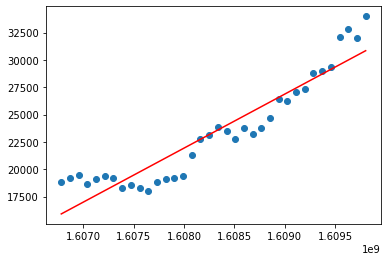

In [174]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [175]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df_1['Return'] = returns.copy()
df_1['Lagged_Return'] = returns.shift()
# Drop NaN values
df_1 = df_1.dropna()
df_1.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-09  453.382996  454.640015  446.889008  447.610992  447.610992   
2016-01-10  448.238007  448.308990  440.351013  447.990997  447.990997   
2016-01-11  448.697998  450.661987  443.855011  448.428009  448.428009   
2016-01-12  448.182007  448.182007  435.690002  435.690002  435.690002   
2016-01-13  434.665009  435.186005  424.442993  432.371002  432.371002   

                 Volume   Returns       Diff    Return  Lagged_Return  
Date                                                                   
2016-01-09   32278000.0 -0.012398  -5.619019 -0.012398      -0.010519  
2016-01-10   35995900.0  0.000849   0.380005  0.000849      -0.012398  
2016-01-11   40450000.0  0.000975   0.437012  0.000975       0.000849  
2016-01-12  115607000.0 -0.028406 -12.738007 -0.028406       0.000975  
2016-01-13  173888000.0 -0.007618  -3.319000 -0.007618      -0.028406

In [176]:
# Set y as the `Return` column
y = df_1['Return']

In [177]:
# Select the `Lagged_Return` as a DataFrame
X = df_1['Lagged_Return'].to_frame()
X.head()

Lagged_Return
Date                     
2016-01-09      -0.010519
2016-01-10      -0.012398
2016-01-11       0.000849
2016-01-12       0.000975
2016-01-13      -0.028406

In [178]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
X['Week_of_year'] = X.index.weekofyear
X.tail()

Lagged_Return  Week_of_year
Date                                   
2021-01-01       0.005574            53
2021-01-02       0.012842            53
2021-01-03       0.093726            53
2021-01-04       0.020380             1
2021-01-05      -0.024712             1

In [179]:
# Use `get_dummies` to generate the features for each week of the year
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_year'])
X_binary_encoded.tail()

Lagged_Return  Week_of_year_1  Week_of_year_2  Week_of_year_3  \
Date                                                                        
2021-01-01       0.005574               0               0               0   
2021-01-02       0.012842               0               0               0   
2021-01-03       0.093726               0               0               0   
2021-01-04       0.020380               1               0               0   
2021-01-05      -0.024712               1               0               0   

            Week_of_year_4  Week_of_year_5  Week_of_year_6  Week_of_year_7  \
Date                                                                         
2021-01-01               0               0               0               0   
2021-01-02               0               0               0               0   
2021-01-03               0               0               0               0   
2021-01-04               0               0               0               0   
2021-01-05               0               0               0               0   

            Week_of_year_8  Week_of_year_9  ...  Week_of_year_44  \
Date                                        ...                    
2021-01-01               0               0  ...                0   
2021-01-02               0               0  ...                0   
2021-01-03               0               0  ...                0   
2021-01-04               0               0  ...                0   
2021-01-05               0               0  ...                0   

            Week_of_year_45  Week_of_year_46  Week_of_year_47  \
Date                                                            
2021-01-01                0                0                0   
2021-01-02                0                0                0   
2021-01-03                0                0                0   
2021-01-04                0                0                0   
2021-01-05                0                0                0   

            Week_of_year_48  Week_of_year_49  Week_of_year_50  \
Date                                                            
2021-01-01                0                0                0   
2021-01-02                0                0                0   
2021-01-03                0                0                0   
2021-01-04                0                0                0   
2021-01-05                0                0                0   

            Week_of_year_51  Week_of_year_52  Week_of_year_53  
Date                                                           
2021-01-01                0                0                1  
2021-01-02                0                0                1  
2021-01-03                0                0                1  
2021-01-04                0                0                0  
2021-01-05                0                0                0  

[5 rows x 54 columns]

In [180]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X_binary_encoded, y)

LinearRegression()

In [181]:
# List the first 10 predicted values
predictions = model.predict(X_binary_encoded)
predictions[:10]

array([ 0.01147461,  0.01171875, -0.01489258, -0.01489258, -0.01342773,
       -0.0144043 , -0.01464844, -0.0065918 , -0.01831055,  0.00634766])